In [28]:
from qiskit import *
from qiskit.visualization import *
from qiskit.circuit.library import MCMT

from qiskit.visualization import plot_histogram
from qiskit.circuit.library import QFT

import numpy as np
import matplotlib.pyplot as plt
import math

sim = Aer.get_backend('qasm_simulator')

# using tikzplotlib to export plot to latex
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

In [29]:
sudoku = [[1,0,0],
          [2,0,1],
          [0,1,0]]

# dans la sortie, les 0 seront les 2 et les 1 seront les 3
# la sortie sera donc devra donc être 2, 3, 3, 3, 2
# soit 01110

In [30]:
input_reg = QuantumRegister(5, name='input')
cond_reg = QuantumRegister(6, name='cond')
kick_reg = QuantumRegister(1, name='kick')
mes_reg = ClassicalRegister(5, name='mes')

In [37]:
num_it = int(np.floor(np.pi / 4 * np.sqrt(2**5)))
num_it

4

In [36]:
qc = QuantumCircuit(input_reg, cond_reg, kick_reg, mes_reg)

# initialisation
qc.h(input_reg)

qc.x(kick_reg)
qc.h(kick_reg)

qc.barrier()

# conditions
def conditions():
    qc.cx(input_reg[0], cond_reg[0])
    qc.cx(input_reg[1], cond_reg[0])

    qc.cx(input_reg[0], cond_reg[1])
    qc.cx(input_reg[3], cond_reg[1])
    
    qc.cx(input_reg[1], cond_reg[2])
    # condition sur nombre donné 2 : soit 0
    
    qc.cx(input_reg[2], cond_reg[3])
    # condition sur nombre donné 2 : soit 0
    
    qc.cx(input_reg[2], cond_reg[4])
    qc.cx(input_reg[4], cond_reg[4])
    
    qc.cx(input_reg[3], cond_reg[5])
    qc.cx(input_reg[4], cond_reg[5])
    
# oracle
def oracle():
    conditions()
    qc.mct(cond_reg, kick_reg)
    conditions()
    
# diffusion
def diffuser():
    qc.h(input_reg)
    qc.x(input_reg)
    qc.h(input_reg[4])
    qc.mct(input_reg[0:4], input_reg[4])
    qc.h(input_reg[4])
    qc.x(input_reg)
    qc.h(input_reg)
    
# circuit
for i in range(num_it):
    oracle()
    qc.barrier()
    diffuser()
    qc.barrier()
    
qc.measure(input_reg, mes_reg)

print(qc.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{input}_{0} :  } & \lstick{{input}_{0} :  } & \gate{\mathrm{H}} & \qw \barrier[0em]{11} & \qw & \ctrl{5} & \qw & \qw & \ctrl{6} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \ctrl{5} & \qw & \qw & \ctrl{6} & \qw & \qw & \qw & \qw & \qw & \qw \barrier[0em]{11} & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \qw & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw \barrier[0em]{11} & \qw & \ctrl{5} & \qw & \qw & \ctrl{6} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \ctrl{5} & \qw & \qw & \ctrl{6} & \qw & \qw & \qw & \qw & \qw & \qw \barrier[0em]{11} & \qw & \gate{\mathrm{H}} & \gate{\mathrm{X}} & \qw & \ctrl{1} & \gate{\mathrm{X}} & \gate{\mathrm{H}} & \qw \barrier[0em]{11} & \qw & \ctrl{5} & \qw & \qw & \ctrl{6} & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \ctrl{5} & \qw & \qw & \ctrl{6} & \qw & \qw & \qw & \qw 

In [33]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

backend = provider.get_backend('simulator_mps')

ibmqfactory.load_account:WARNING:2023-08-27 17:55:06,643: Credentials are already in use. The existing account in the session will be replaced.


debut
execute done


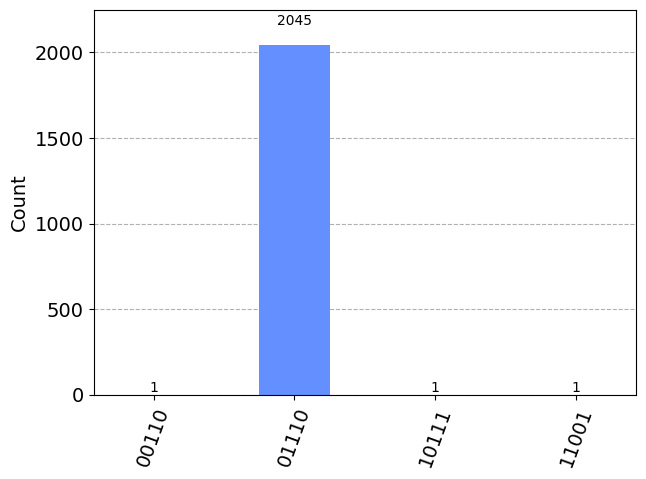

In [34]:
print('debut')
results = execute(qc, backend=backend, shots=2048).result()
print('execute done')
counts = results.get_counts()
plot_histogram(counts)

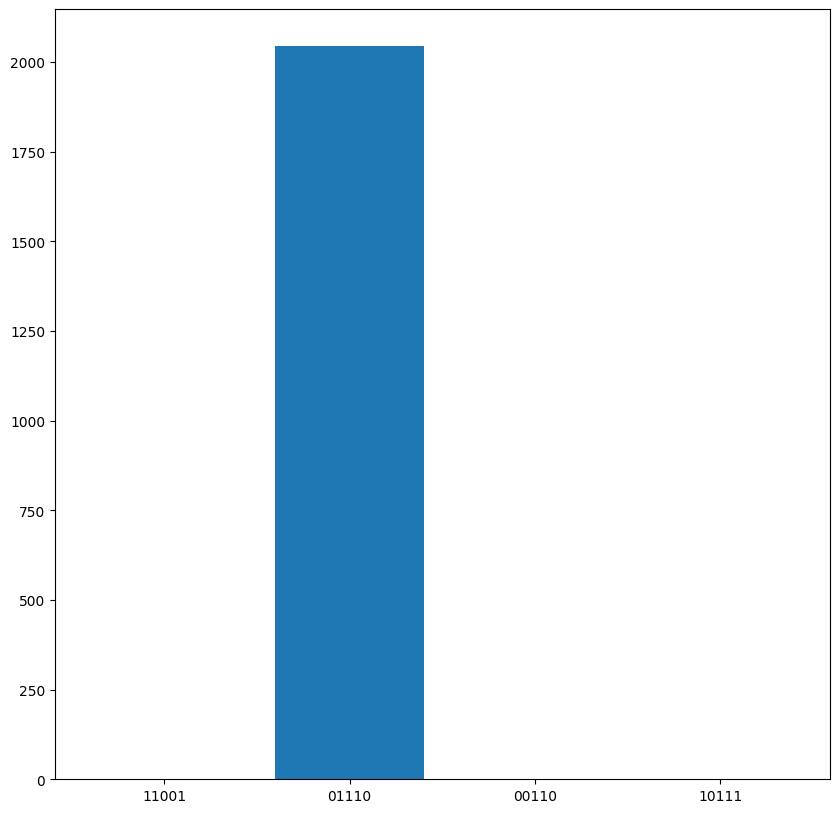

In [35]:
with open('out.txt', 'w+') as f:
    print(counts, file=f)

plt.figure(figsize=(10, 10))
plt.bar(list(counts.keys()), list(counts.values()))
save_fig('sudoku_result')